In [1]:
import matplotlib.pyplot as plt
import tissue_segmentation
import numpy as np

Welcome to the tissue segmentation notebook. Here, you'll be guided on how to run the tissue segmentation for your mice.

First, you need the masked non-organs data for the full-resolution mice. For this, you need to have run the organ segmentation in the previous step. 
If you don't have this data, don't worry - you can still run the tissue segemntation (also on only pieces of a whole mouse), only there are expected to be more false positives.

Then, the mice need to be cropped into reasonable sized cubes. For the experiments presented in the paper, we have carried out inference using patch sizes of 500x500x500 voxels. We provide an exemplary sample in the example_data folder, so you can test out our pipeline.
The input to the model has two channels: Autofluorescence and PI (Propinium Iodine). The Autofluorescence samples need to be named ending "_0000.nii.gz", and PI in "_0001.nii.gz"

/home/izabela/Documents/Code/ex_for_tissue_seg/images/2000i9j1crop_210_0000.nii.gz
/home/izabela/Documents/Code/ex_for_tissue_seg/images/2000i9j1crop_210_0001.nii.gz


(-0.5, 255.5, 255.5, -0.5)

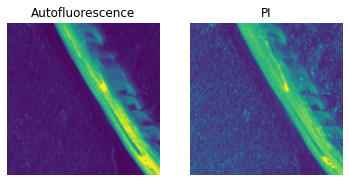

In [2]:
image_autofluo = tissue_segmentation.readNifti('./example_data/images/2000i9j1crop_210_0000.nii.gz')
image_PI = tissue_segmentation.readNifti('./example_data/images/2000i9j1crop_210_0001.nii.gz')

fig, axis = plt.subplots(1, 2)
axis[0].imshow(np.max(image_autofluo, axis=2),vmin=0,vmax=.5)
axis[0].set_title('Autofluorescence')
axis[0].axis('off')

axis[1].imshow(np.max(image_PI, axis=2),vmin=0,vmax=0.05)
axis[1].set_title('PI')
axis[1].axis('off')

Next, you need to run nnunetv2 . You can find the trained model in the "models" folder, named Dataset310_AllSeg.
and for using it, please use the information here: https://github.com/MIC-DKFZ/nnUNet/blob/master/documentation/how_to_use_nnunet.md#how-to-deploy-and-run-inference-with-your-pretrained-models

Then, in your terminal, run the following line:

nnUNetv2_predict -d 310 -i path_input_crops -o folder_out_pred -c 3d_fullres -tr nnUNetTrainer 

/home/izabela/Documents/Code/ex_for_tissue_seg/label/2000i9j1crop_210.nii.gz


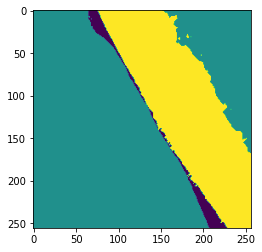

In [8]:
vol_label = tissue_segmentation.readNifti('./example_data/label/2000i9j1crop_210.nii.gz')
plt.imshow(np.max(vol_label, axis=2))   

The resulting output has the following classes: 0: background, 1: fat, 2: muscle, 3 bone, and 4: bone marrow

The resulting segmentations can be rebuilt by the same rules you used for cropping, to the original resolution of the scan.